In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
np.random.seed(64)

In [2]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from sklearn.svm import SVC
np.random.seed(64)

In [3]:
def KFold(X, y, model):
    np.random.seed(64)
    train_scores = []
    test_scores = []
    train_logs = []
    test_logs = []
    for train_index, test_index in RepeatedStratifiedKFold(n_splits=5, n_repeats=5).split(X, y):
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(x_train, y_train)
        pred = model.predict(x_test)

        train_logs.append(metrics.log_loss(y_train, model.predict_proba(x_train)))
        test_logs.append(metrics.log_loss(y_test, model.predict_proba(x_test)))
        train_scores.append(model.score(x_train, y_train))
        test_scores.append(model.score(x_test, y_test))
        
    return train_scores, train_logs, test_scores, test_logs

In [4]:
def test_your_model(X, y ,model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)
    model.fit(x_train, y_train)
    print(model.score(x_train, y_train))
    print(model.score(x_test, y_test))
    print('------------')
    print(metrics.log_loss(y_train, model.predict_proba(x_train)))
    print(metrics.log_loss(y_test, model.predict_proba(x_test)))
    print(metrics.classification_report(y_test, model.predict(x_test)))

In [5]:
data = pd.read_csv('train.csv', dtype = {'Made Donation in March 2007':bool}, index_col=0)

In [6]:
data.rename({'Months since Last Donation':'Months_since_Last_Donation',
                'Number of Donations':'Number_of_Donations',
                'Total Volume Donated (c.c.)':'Total_Volume_Donated',
                'Months since First Donation':'Months_since_First_Donation',
                'Made Donation in March 2007':'Made_Donation'},
                axis=1, inplace=True)

In [7]:
data.head()

,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation
619,2,50,12500,98,True
664,0,13,3250,28,True
441,1,16,4000,35,True
160,2,20,5000,45,True
358,1,24,6000,77,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 619 to 74
Data columns (total 5 columns):
Months_since_Last_Donation     576 non-null int64
Number_of_Donations            576 non-null int64
Total_Volume_Donated           576 non-null int64
Months_since_First_Donation    576 non-null int64
Made_Donation                  576 non-null bool
dtypes: bool(1), int64(4)
memory usage: 23.1 KB


In [9]:
data.describe()

,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


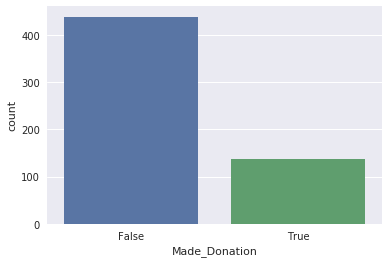

In [10]:
sns.countplot(data['Made_Donation']);

In [11]:
data['months_between_donations'] = data['Months_since_First_Donation'] - data['Months_since_Last_Donation']
data['month_per_donation'] =  data['months_between_donations'] / data['Number_of_Donations'] # 'average time between donations'
#     data['mean_volume_per_donation'] = data['Total_Volume_Donated'] / data['Number_of_Donations']
data['time_to_next_donation'] = data['month_per_donation']  - data['Months_since_Last_Donation']
data['Is_suppose_to_donate'] = data['time_to_next_donation'].apply(lambda x: x <= 0)
data.assign(Sholud_have_been_donation = lambda df: df['time_to_next_donation'] > 0)

data.head()

,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation,months_between_donations,month_per_donation,time_to_next_donation,Is_suppose_to_donate
619,2,50,12500,98,True,96,1.920000,-0.080000,True
664,0,13,3250,28,True,28,2.153846,2.153846,False
441,1,16,4000,35,True,34,2.125000,1.125000,False
160,2,20,5000,45,True,43,2.150000,0.150000,False
358,1,24,6000,77,False,76,3.166667,2.166667,False


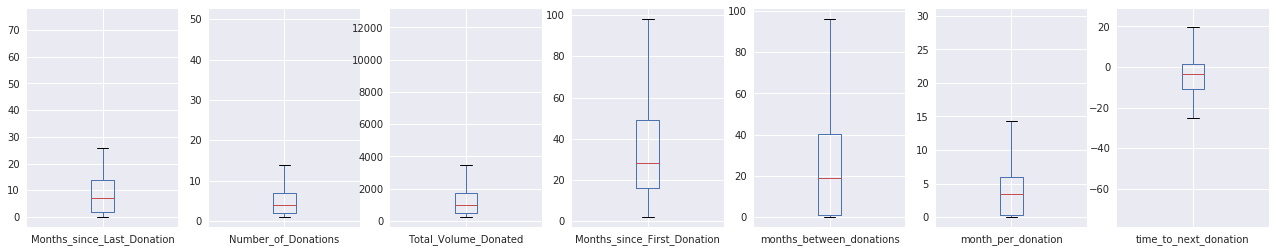

In [12]:
data.plot(kind='box', subplots=True);
plt.subplots_adjust(right=3)

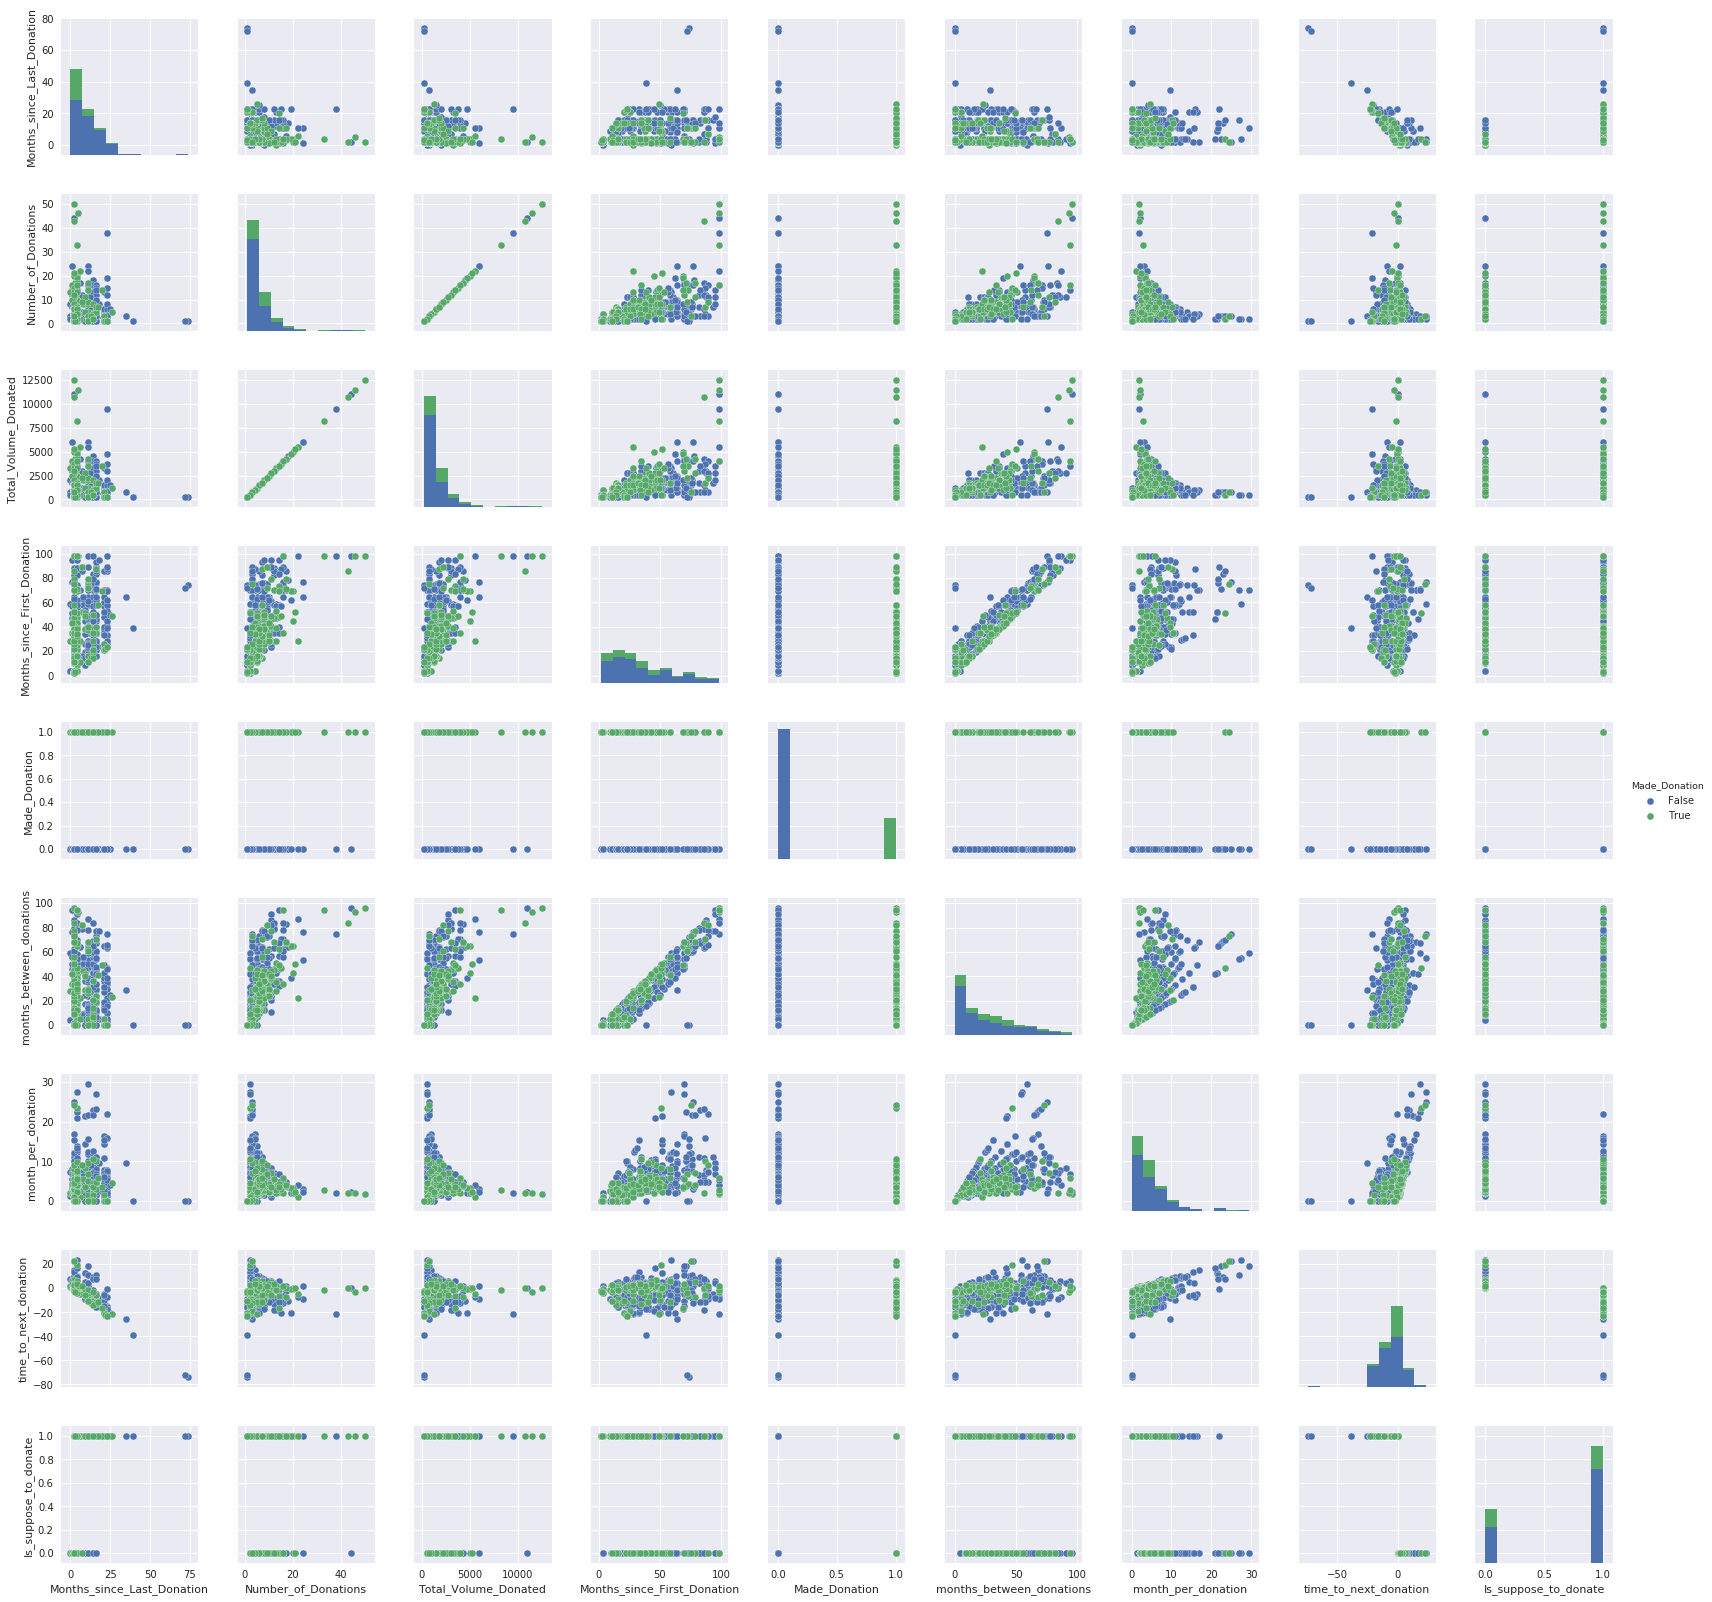

In [13]:
sns.pairplot(data, hue='Made_Donation');

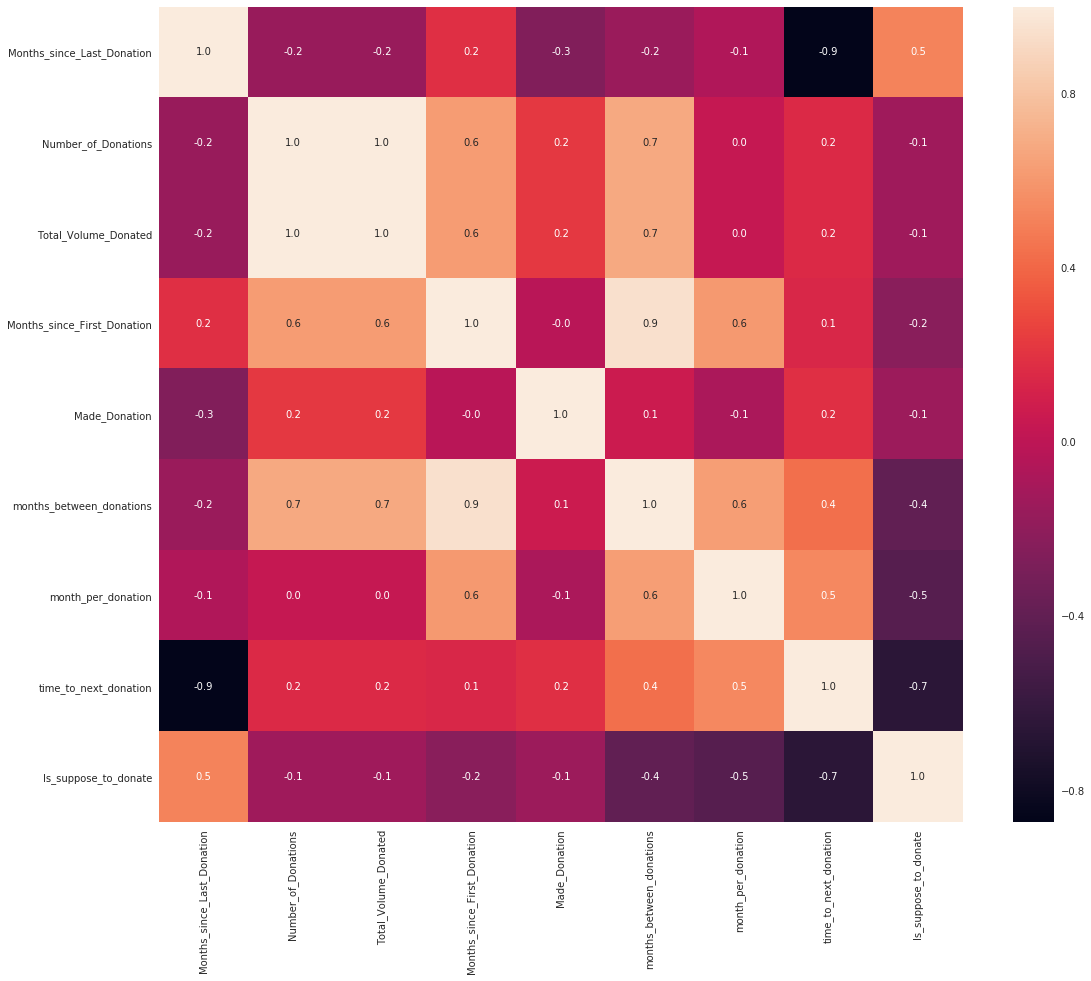

In [14]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(), annot=True, fmt=".1f");

/home/ariel/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


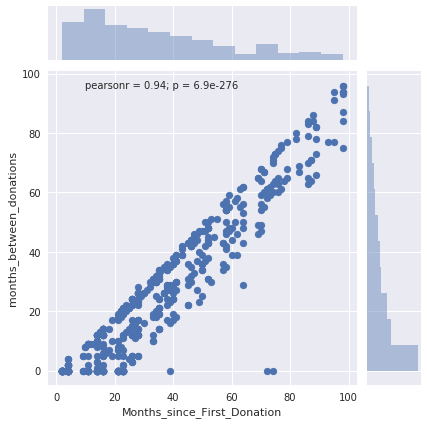

In [15]:
sns.jointplot(data=data, x='Months_since_First_Donation', y='months_between_donations')

### Plot the data in 2D

In [16]:
from sklearn.decomposition import PCA

np.random.seed(64)
X = data.drop('Made_Donation', axis=1)
y = data['Made_Donation']

data_2d =PCA(n_components=2).fit_transform(X)

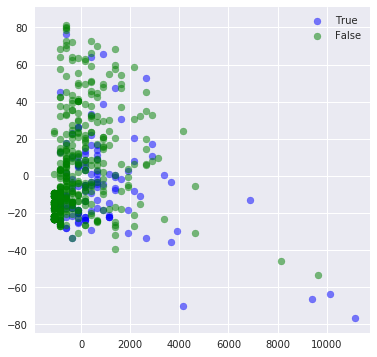

In [17]:
plt.figure(figsize=(6, 6))
for color, i in zip(['b', 'g'], [True, False]):
    plt.scatter(data_2d[y == i, 0], data_2d[y == i, 1], alpha=0.5, color=color, label=i);
plt.legend(loc="best");

In [18]:
np.random.seed(64)
X = data.drop('Made_Donation', axis=1)
y = data['Made_Donation']

# linear models mabe for an ensemble?

In [30]:
np.random.seed(64)
model = Pipeline(
    [
#         ('scaler', StandardScaler()),
#         ('RF', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2,
#                                       min_samples_split=8, min_samples_leaf=7, max_features='auto',
#                                         n_jobs=-1))
        ('dvm', SVC(probability=True, C=1, kernel='rbf', gamma='auto',  shrinking=True,
                    tol=0.001, cache_size=200, class_weight=None, max_iter=-1)) #'linear', 'poly', 'rbf', 'sigmoid',
#         ('logreg', LogisticRegression(penalty='l2', C=1.0, class_weight=None,
#                                       solver='liblinear', max_iter=100, n_jobs=-1))
    ]
)

test_your_model(X, y ,model)

0.9282407407407407
0.7708333333333334
------------
0.3899986263075397
0.5297129320953474
             precision    recall  f1-score   support

      False       0.79      0.96      0.87       110
       True       0.56      0.15      0.23        34

avg / total       0.73      0.77      0.72       144



In [44]:
np.random.seed(64)
model = Pipeline(
    [
#         ('scaler', StandardScaler()),
#         ('RF', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2,
#                                       min_samples_split=8, min_samples_leaf=7, max_features='auto',
#                                         n_jobs=-1))
        ('xgb', xgb.XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, objective='reg:logistic',
                                  booster='dart', n_jobs=-1, nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0,
                                  subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1,
                                  scale_pos_weight=3)) #'linear', 'poly', 'rbf', 'sigmoid',
#         ('logreg', LogisticRegression(penalty='l2', C=1.0, class_weight=None,
#                                       solver='liblinear', max_iter=100, n_jobs=-1))
    ]
)

test_your_model(X, y ,model)

0.8842592592592593
0.6458333333333334
------------
0.43277289649402656
0.6295710700667567
             precision    recall  f1-score   support

      False       0.81      0.70      0.75       110
       True       0.33      0.47      0.39        34

avg / total       0.70      0.65      0.66       144



/home/ariel/venv/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ariel/venv/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ariel/venv/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
np.random.seed(64)

model = Pipeline(
    [
#         ('scaler', StandardScaler()),
        ('RF', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10,
                                          min_samples_split=4, min_samples_leaf=2, min_weight_fraction_leaf=0.0,
                                          max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                                          min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1,
                                          class_weight=None))
    ]
)

train_scores, train_logs, test_scores, test_logs = KFold(X, y, model)


In [ ]:
for i in [train_scores, test_scores, train_logs, test_logs]:
    print(np.mean(i))

In [ ]:
np.random.seed(64)
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)
model.fit(x_train, y_train)
print(metrics.log_loss(y_train, model.predict_proba(x_train)))
print(metrics.log_loss(y_test, model.predict_proba(x_test)))
print(metrics.classification_report(y_test, model.predict(x_test)))


### Grid Search cv

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
#     'RF__n_estimators':[10, 50, 100, 200],
    'RF__max_depth':[None, 2, 5, 7, 10, 30],
#     'RF__class_weight':[None, 'balanced'],
#     'RF__max_features':['auto', 0.7, 1.0, 0.5],
    'RF__min_samples_leaf':[4, 5, 6, 7],
    'RF__min_samples_split':[5, 6, 7, 8]
        }

GCV = GridSearchCV(model, params, scoring='neg_log_loss', n_jobs=-1, cv=5, verbose=2)
GCV.fit(X, y)

In [ ]:
GCV.best_params_

In [ ]:
GCV.best_score_

### Log all the data

In [ ]:
original_cols = ['Number_of_Donations', 'Months_since_First_Donation', 'Total_Volume_Donated', 'Months_since_Last_Donation']
X_new = X.copy()
X_new[original_cols] = X_new[original_cols].apply(lambda x: np.log(x))

In [ ]:
wrongs = X_new[X_new['Months_since_Last_Donation'] < 0].index

In [ ]:
X_new.loc[wrongs,'Months_since_Last_Donation'] = 0

In [ ]:
np.random.seed(64)
x_train_new, x_test_new, y_train, y_test = train_test_split(X_new, y, stratify=y)
model.fit(x_train_new, y_train)
print(metrics.log_loss(y_train, model.predict_proba(x_train_new)))
print(metrics.log_loss(y_test, model.predict_proba(x_test_new)))
print(metrics.classification_report(y_test, model.predict(x_test_new)))

In [ ]:
f_importance = RandomForestClassifier().fit(x_train, y_train).feature_importances_
pd.DataFrame({'columns':x_train.columns,'scores': f_importance}).sort_values('scores', ascending=False)

### How much the test data differs from the train data
plot both the train and the test after pca in 2d and see the distribution 